<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [27]:
from typing import List
import requests

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    url = "https://archive-api.open-meteo.com/v1/archive/"
    features = ",".join(features)
    params = {
        "latitude":latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "daily": features,
        "timezone":"GMT",
    }
    response = requests.get(url, params=params)
    response.raise_for_status()
    weather = response.json()
    return weather
    

    

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [28]:
# add your code here
import pandas as pd

london_latitude = 51.5072
london_longitude = 0.1276
start_date = "1950-01-01"
end_date = "1954-12-31"
features = {"temperature_2m_mean","temperature_2m_min","temperature_2m_max","rain_sum",}

data = acquire_data(london_latitude, london_longitude, start_date, end_date, features)

In [29]:
meta_data = pd.DataFrame(data['daily'])
meta_data.head()

,time,rain_sum,temperature_2m_min,temperature_2m_mean,temperature_2m_max
0,1950-01-01,0.0,-1.6,1.5,4.2
1,1950-01-02,0.0,0.1,6.8,10.5
2,1950-01-03,1.7,10.1,10.5,11.2
3,1950-01-04,0.0,8.1,9.4,10.6
4,1950-01-05,2.7,6.0,8.2,9.5


In [30]:
# delete daily data from 'data', and store in time_series
time_series = data.pop("daily")
time_series = pd.DataFrame(time_series)
time_series.head()

,time,rain_sum,temperature_2m_min,temperature_2m_mean,temperature_2m_max
0,1950-01-01,0.0,-1.6,1.5,4.2
1,1950-01-02,0.0,0.1,6.8,10.5
2,1950-01-03,1.7,10.1,10.5,11.2
3,1950-01-04,0.0,8.1,9.4,10.6
4,1950-01-05,2.7,6.0,8.2,9.5


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


In [31]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))
    ax.plot(x,y)
    ax.margins(x = 0)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20], x[::20], rotation = 60)
    return fig,ax

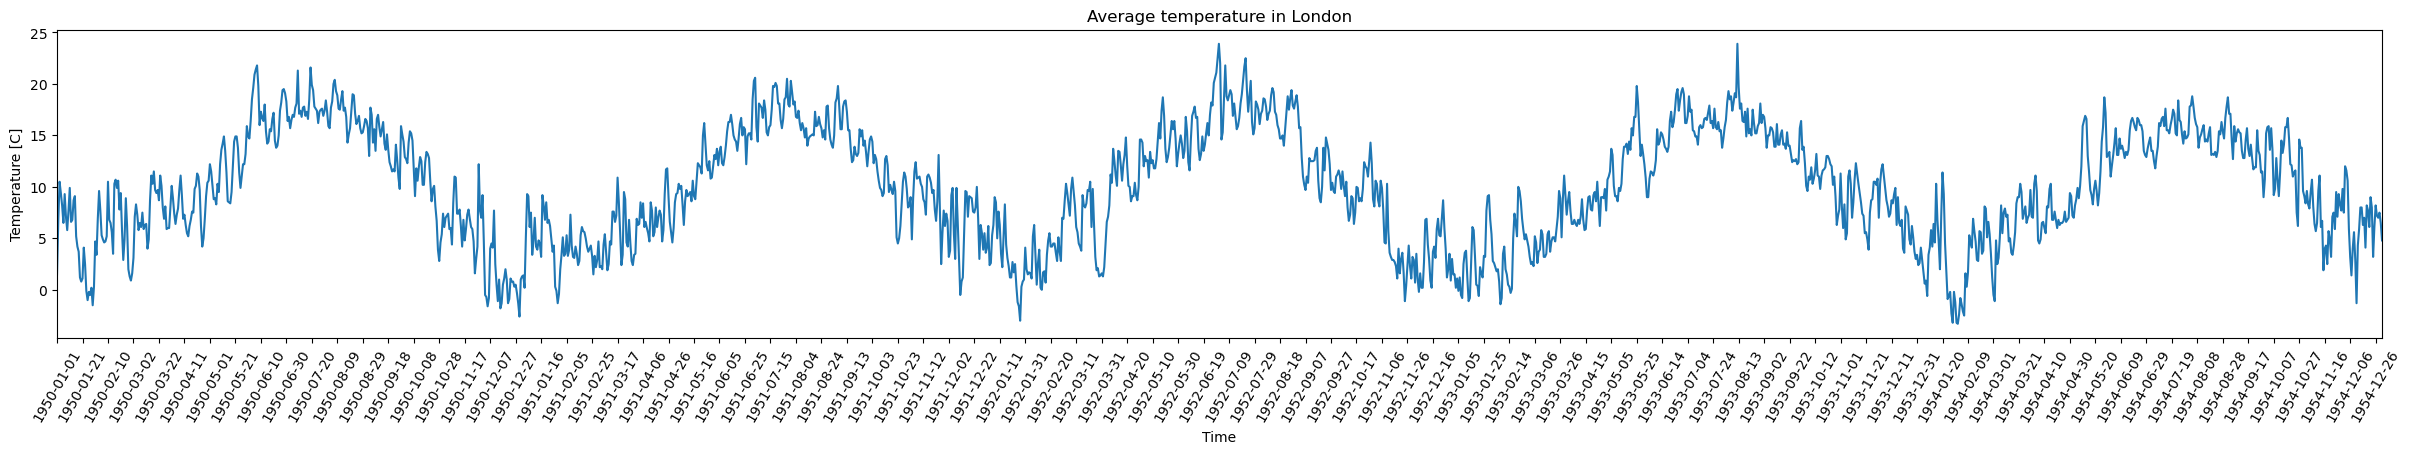

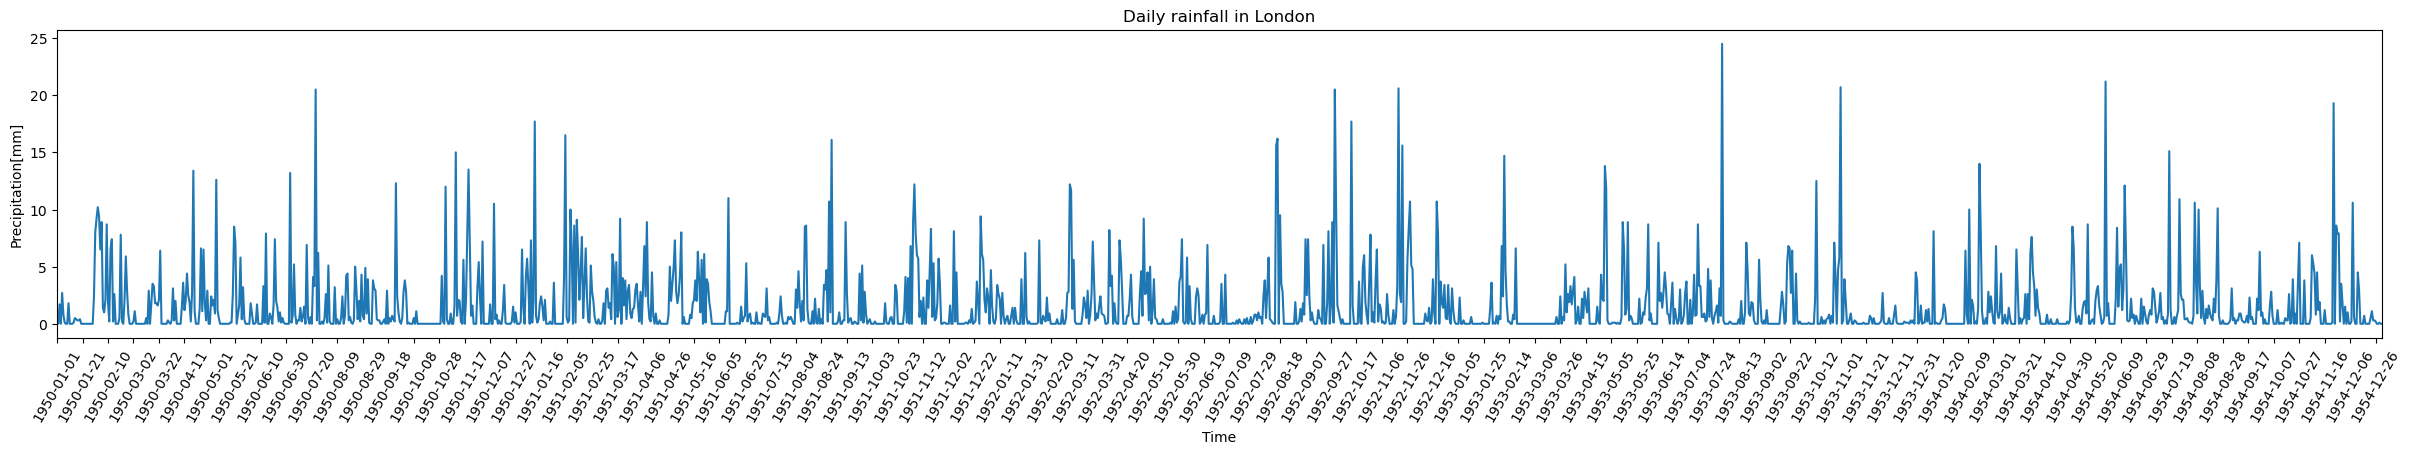

In [32]:
x = time_series['time']
y = time_series['temperature_2m_mean']

#avg temperature
fig, ax = lineplot(x,y,"Average temperature in London","Time","Temperature [C]")
plt.show()

x = time_series['time']
y = time_series['rain_sum']
fig, ax = lineplot(x,y,"Daily rainfall in London","Time","Precipitation[mm]")
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

In [33]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))
    ax.margins(x = 0)
    for y, label in zip(ys, legend):
        ax.plot(x, y, label=label)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(loc = 'upper right')
    ax.set_xticks(x[::20], x[::20], rotation = 60)
    return fig,ax

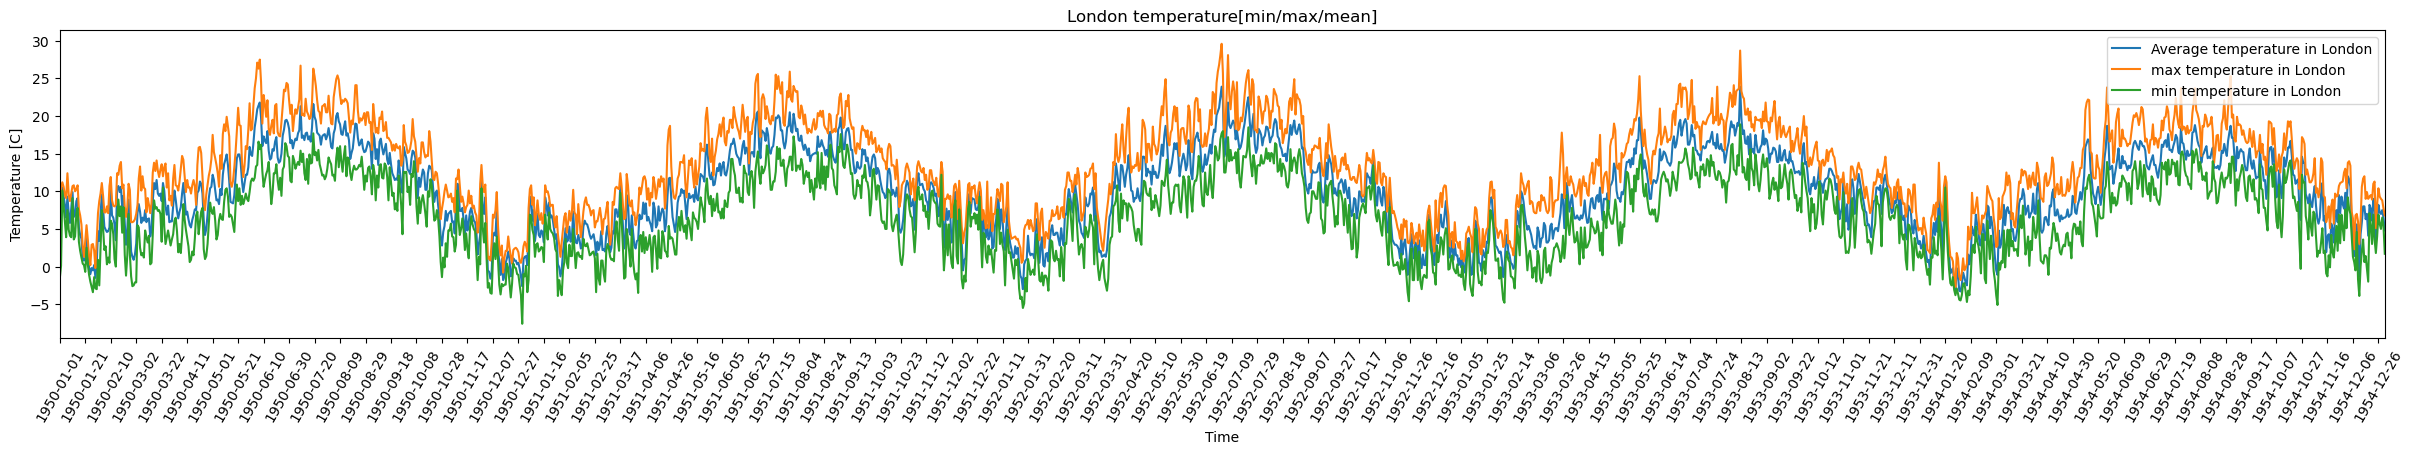

In [34]:
x = time_series['time'].values.tolist()
ys = time_series[['temperature_2m_mean','temperature_2m_max','temperature_2m_min']].transpose().values.tolist()
legend = ['Average temperature in London', 'max temperature in London','min temperature in London']

#avg temperature
fig, ax = lineplots(x,ys,"London temperature[min/max/mean]","Time","Temperature [C]",legend)
plt.show()


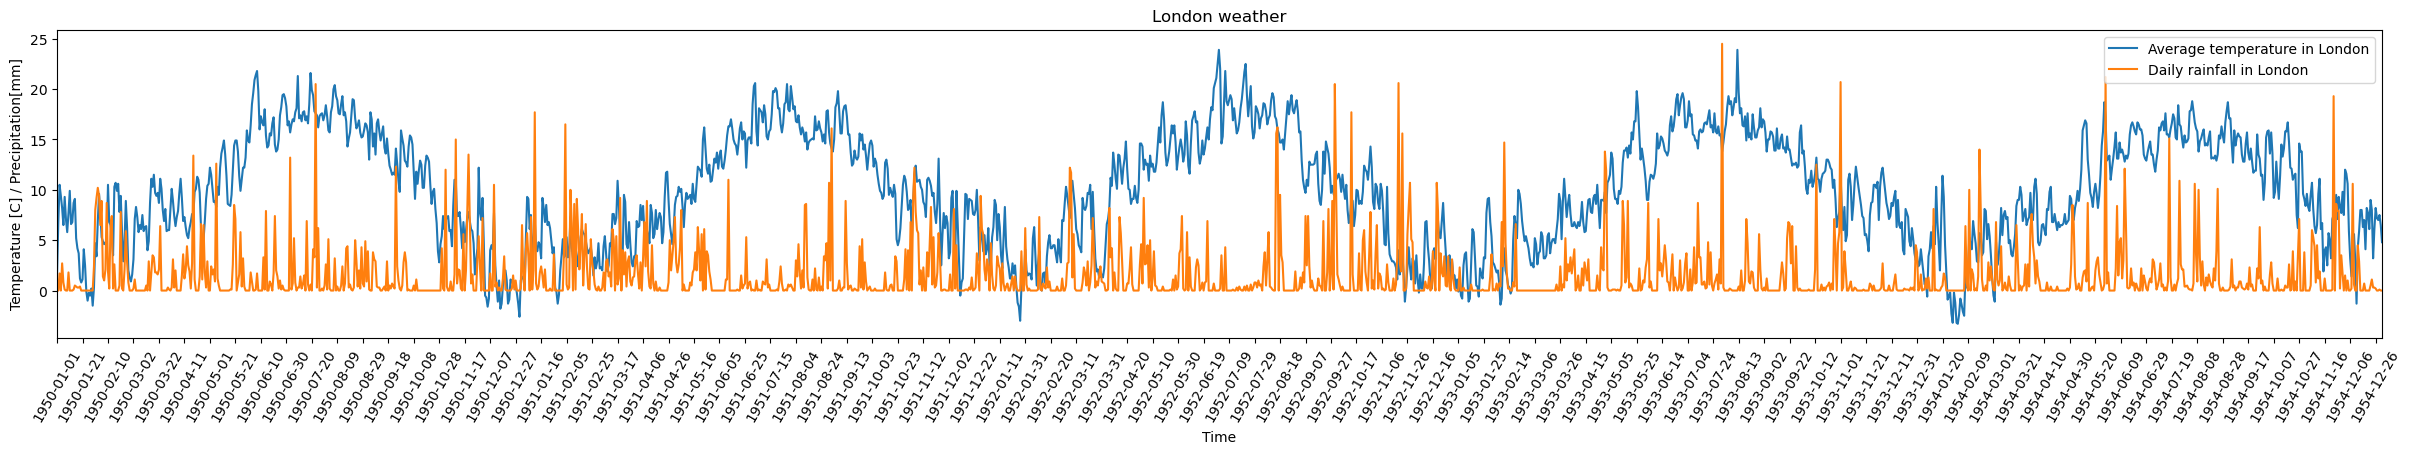

In [35]:
x = time_series['time'].values.tolist()
ys = time_series[['temperature_2m_mean','rain_sum']].transpose().values.tolist()
legend = ['Average temperature in London', 'Daily rainfall in London']

#avg temperature
fig, ax = lineplots(x,ys,"London weather","Time","Temperature [C] / Precipitation[mm]",legend)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


In [36]:
# add your code here
def shaded_area_plot(x, mean_temp, min_temp, max_temp, title, x_label, y_label):
    fig, ax = plt.subplots(1, figsize=(30, 4))
    
    # Plot mean temperature as a line
    ax.plot(x, mean_temp, label='Mean Temperature')
    
    # Fill the shaded area
    ax.fill_between(x, min_temp, max_temp, alpha=0.3, label='Temperature Range')
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20], x[::20], rotation = 60)
    
    return fig, ax


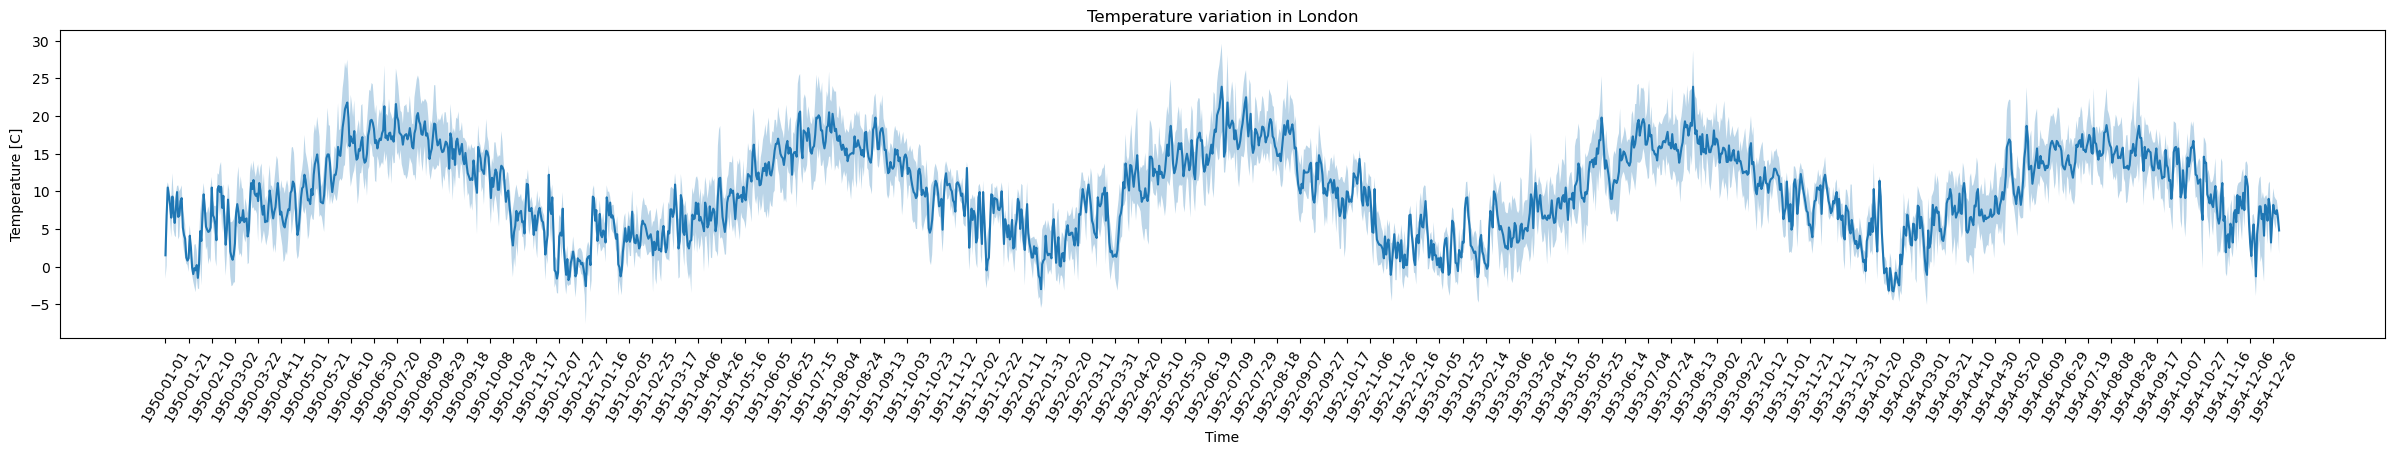

In [37]:
x = time_series['time']
mean_temp = time_series['temperature_2m_mean']
max_temp = time_series['temperature_2m_max']
min_temp = time_series['temperature_2m_min']

#avg temperature
fig, ax = shaded_area_plot(x, mean_temp, min_temp, max_temp,"Temperature variation in London","Time","Temperature [C]")
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [38]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    min_val = np.min(x)
    max_val = np.max(x)
    norm_data = (x - min_val)/(max_val - min_val)
    return norm_data

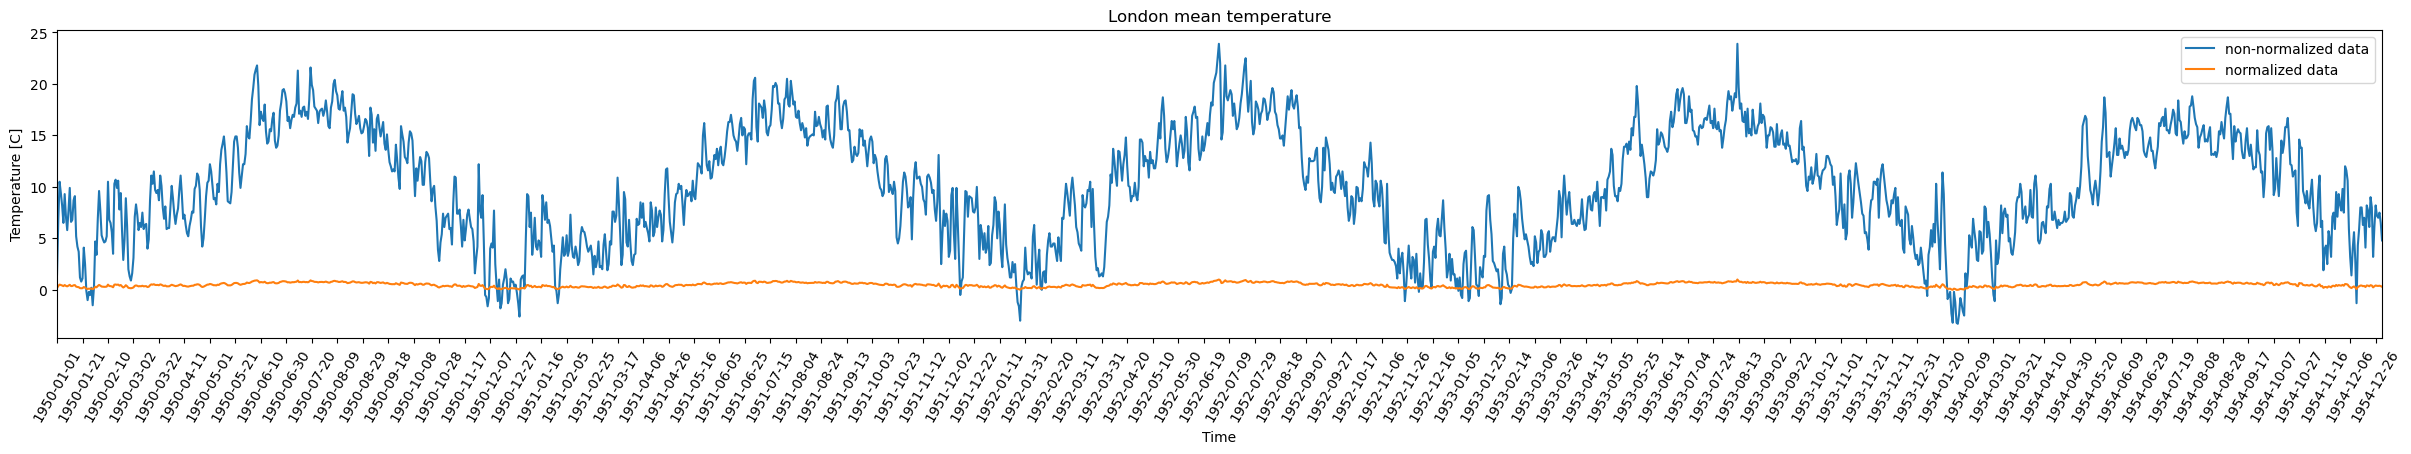

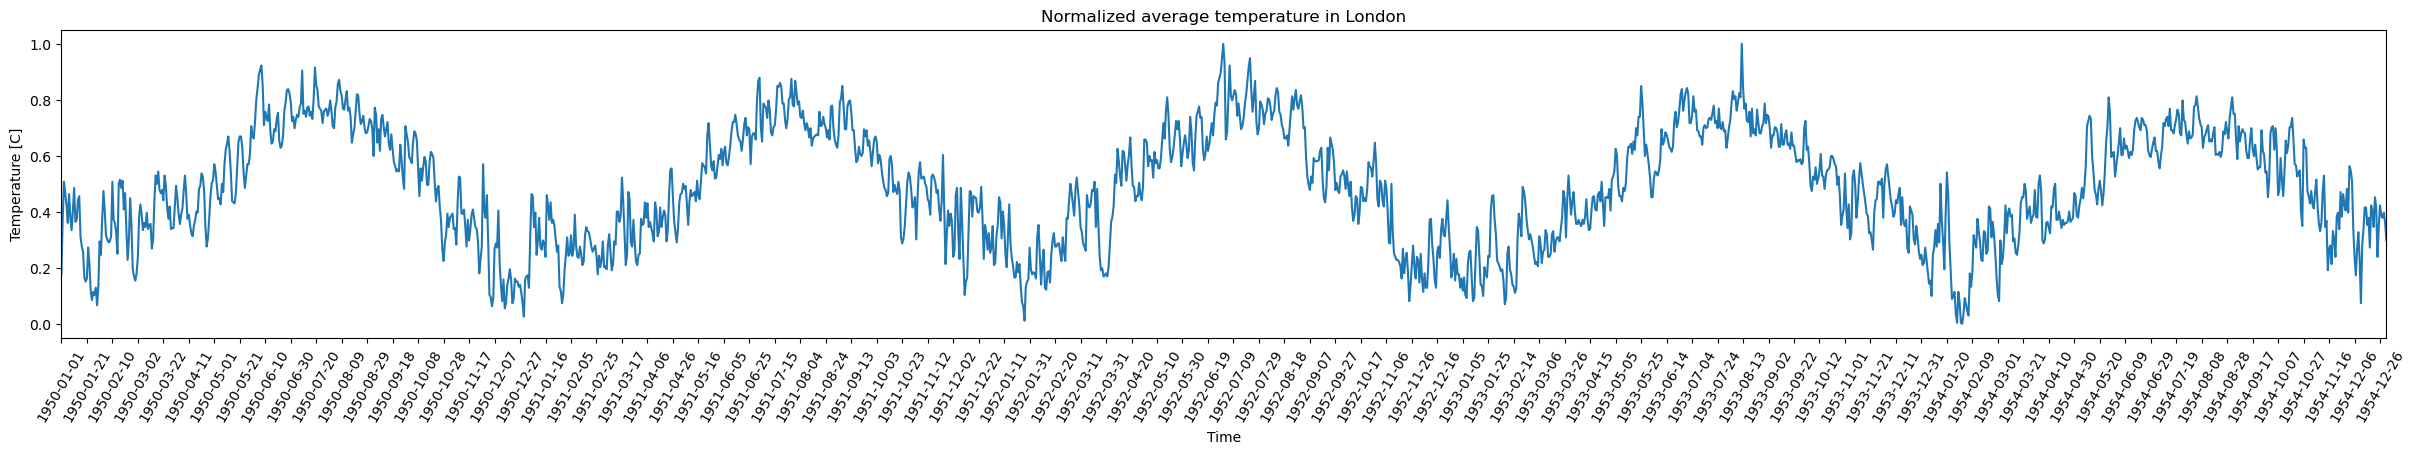

In [39]:
mean_temp = time_series['temperature_2m_mean']
norm_temp = minmax_norm(mean_temp)

x = time_series['time']
ys = [mean_temp,norm_temp]
legend = ['non-normalized data', 'normalized data']

#avg temperature
fig, ax = lineplots(x,ys,"London mean temperature","Time","Temperature [C]",legend)
plt.show()

fig, ax = lineplot(x,norm_temp,"Normalized average temperature in London","Time","Temperature [C]")
plt.show()

`It shows that the trend of the data doesn't change, while the value range is between 0-1 after normalization.`

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [40]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    mean = np.mean(x)
    std_dev = np.std(x)
    normalized_data = (x-mean) / std_dev
    return normalized_data

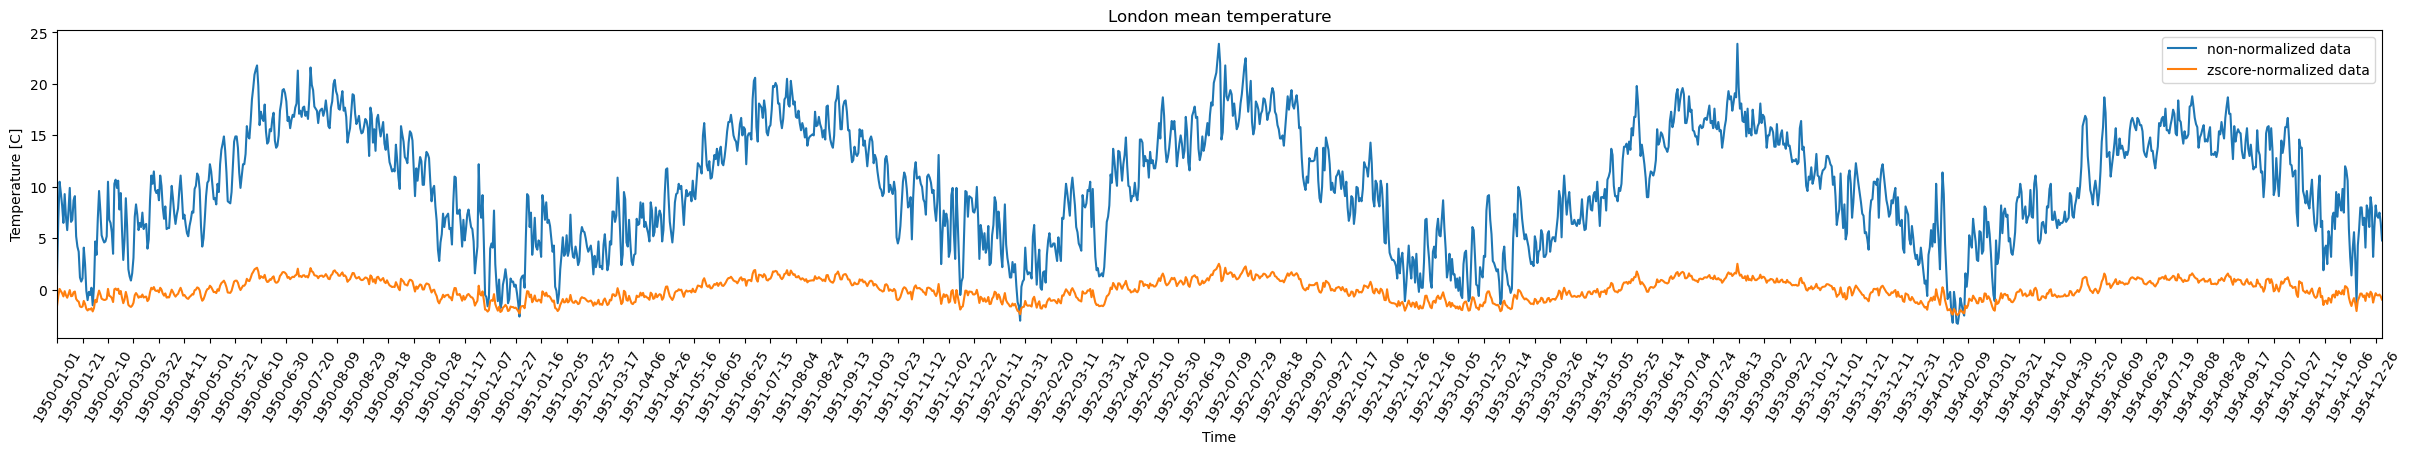

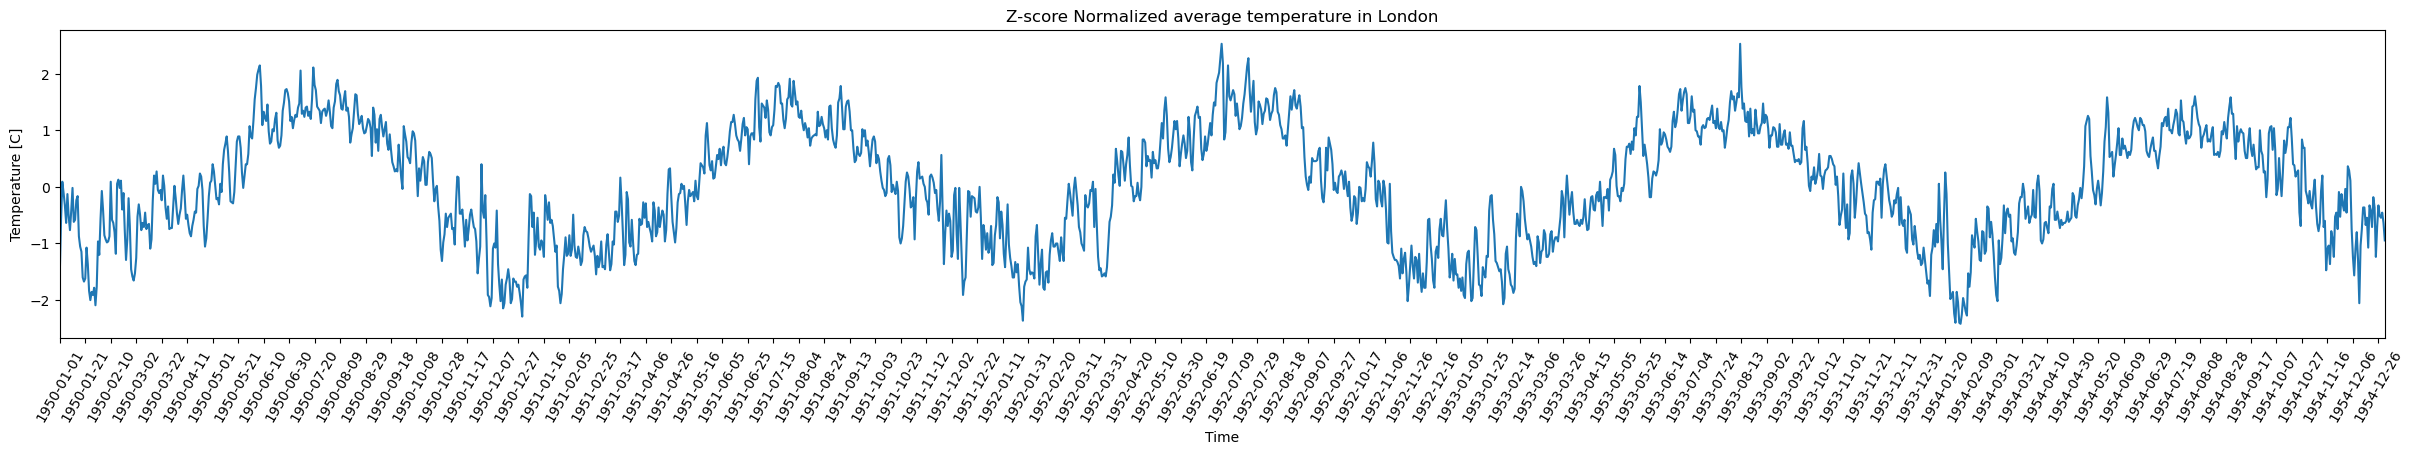

In [41]:
mean_temp = time_series['temperature_2m_mean'].values
znorm_temp = zscore_norm(mean_temp)

x = time_series['time']
ys = [mean_temp,znorm_temp]
legend = ['non-normalized data', 'zscore-normalized data']

#avg temperature
fig, ax = lineplots(x,ys,"London mean temperature","Time","Temperature [C]",legend)
plt.show()

fig, ax = lineplot(x,znorm_temp,"Z-score Normalized average temperature in London","Time","Temperature [C]")
plt.show()

In [42]:
print('The max value in z-score value:', np.max(znorm_temp))
print('The min value in z-score value:', np.min(znorm_temp))

The max value in z-score value: 2.527760183396584
The min value in z-score value: -2.426143086965837


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [43]:
def zscore_outliers(x: ArrayLike, threshold) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    z_scores = (x - np.mean(x)) / np.std(x)
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    return outlier_indices.tolist()

In [44]:
outlier_idx = zscore_outliers(mean_temp, 2)
print("Z-score outliers index number:",outlier_idx)
print("Z-score outliers values:", mean_temp[outlier_idx])


Z-score outliers index number: [24, 28, 156, 157, 189, 199, 338, 346, 348, 349, 354, 362, 363, 393, 754, 755, 756, 910, 911, 912, 913, 917, 932, 933, 1058, 1108, 1133, 1319, 1487, 1488, 1490, 1491, 1492, 1493, 1495, 1496, 1497, 1521, 1805]
Z-score outliers values: [-1.  -1.5 21.4 21.8 21.3 21.6 -1.6 -1.1 -1.8 -1.3 -1.3 -1.3 -2.6 -1.3
 -1.2 -1.6 -3.  21.1 22.5 23.9 22.  21.8 21.7 22.5 -1.1 -1.1 -1.4 23.9
 -2.3 -3.2 -1.2 -3.2 -3.3 -2.4 -1.4 -2.1 -2.5 -1.1 -1.3]


There are no outliers when the thershold is 3, so I set it as 2&2.5 to test the function.

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

In [45]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike, title, x_label, y_label) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))
    ax.plot(x,y)
    ax.margins(x = 0)

    ax.plot(outliers_idx, y[outliers_idx], 'ro')  # 'ro' represents red dots
    ax.set_xticks(x[::20], x[::20], rotation = 60)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    
    return fig, ax



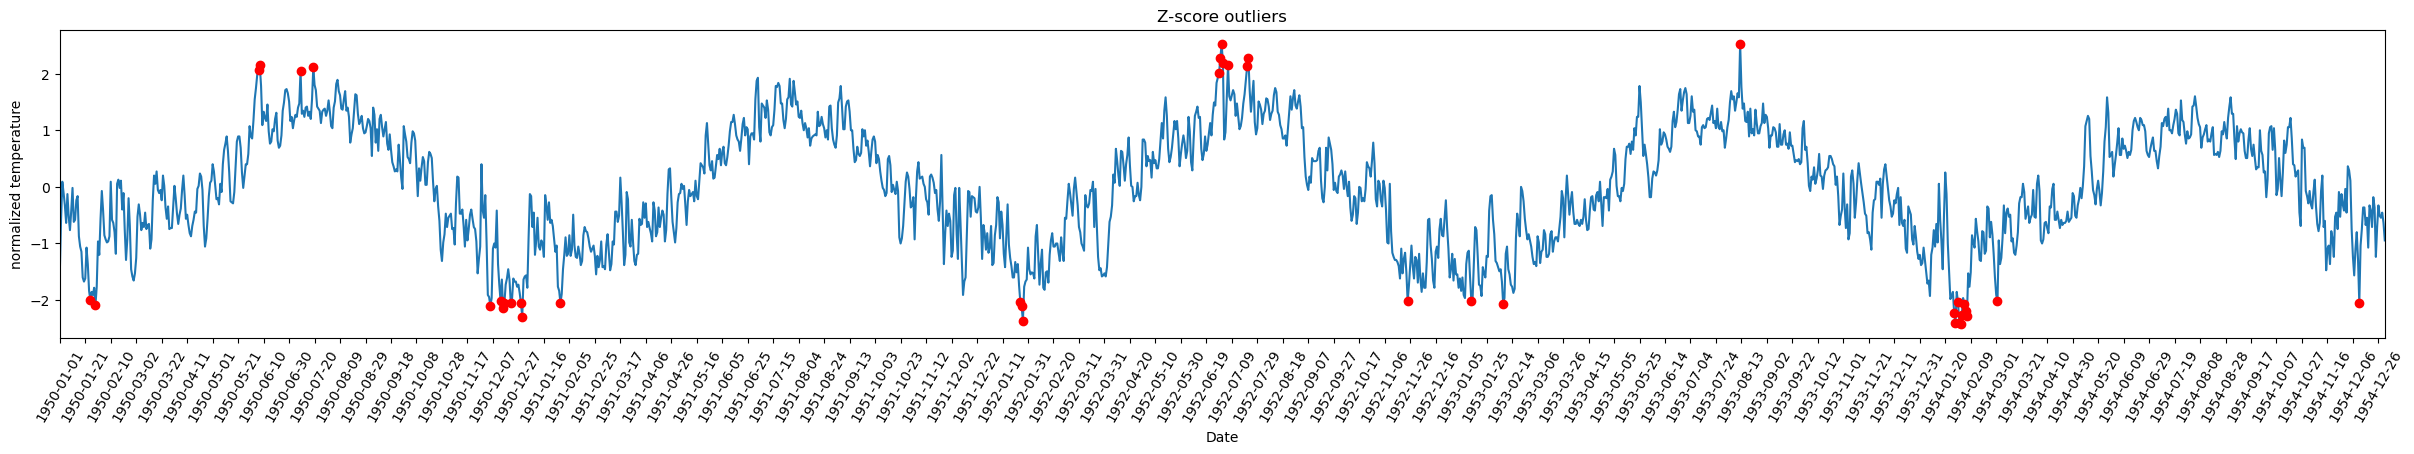

In [46]:
fig, ax = mark_outliers(ax, x, znorm_temp, outlier_idx, 'Z-score outliers', 'Date', 'normalized temperature')

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


`About IQR`  
The IQR (Interquartile Range) method for detecting outliers involves finding the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. Outliers are typically defined as values that fall below the first quartile minus 1.5 times the IQR, or above the third quartile plus 1.5 times the IQR.

In [47]:
def iqr_detect(x: ArrayLike, threshold) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outlier_indices = np.where((x < lower_bound) | (x > upper_bound))[0]
    return outlier_indices.tolist()

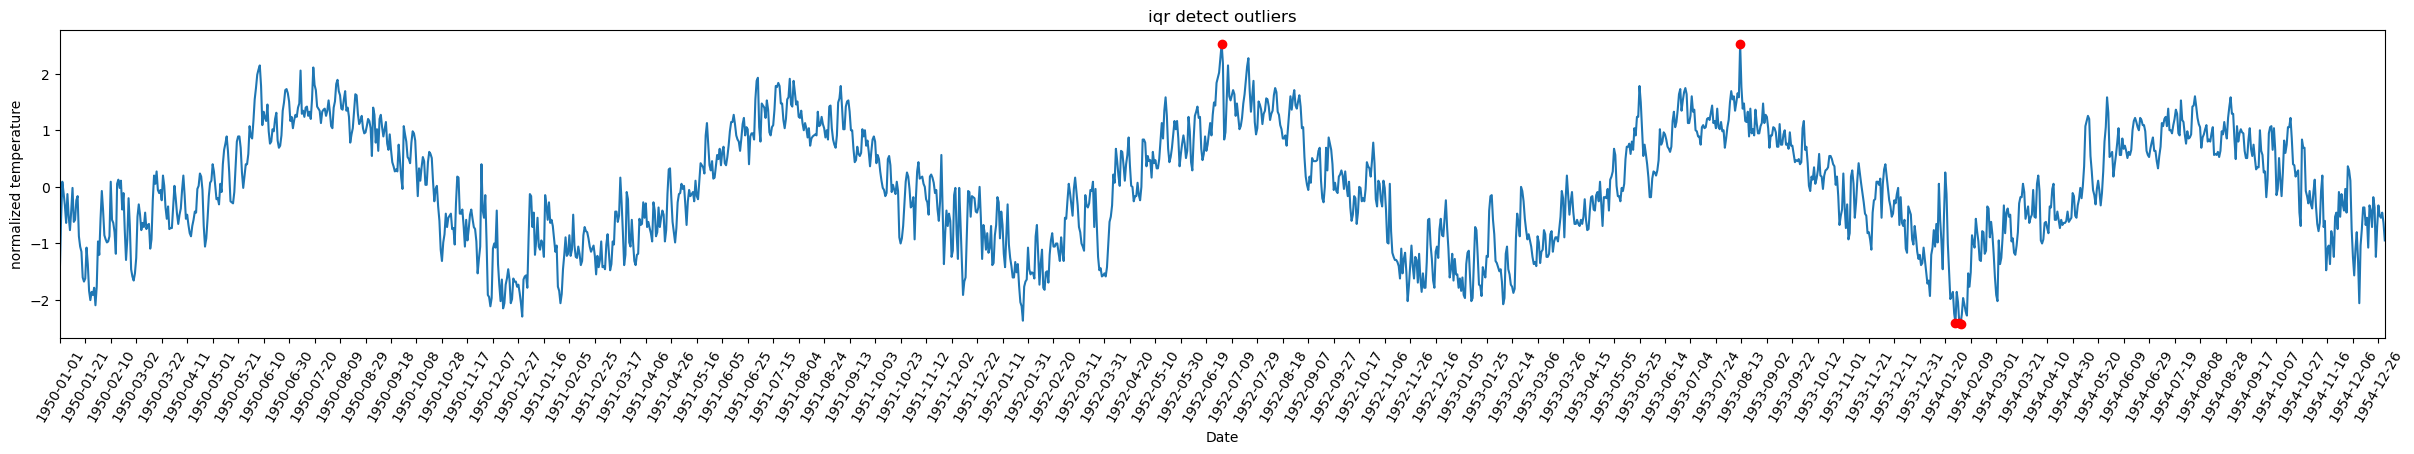

In [48]:
outlier_idx2 = iqr_detect(mean_temp, 1)  #th = 1.5, no data detected
fig, ax = mark_outliers(ax, x, znorm_temp, outlier_idx2, 'iqr detect outliers', 'Date', 'normalized temperature')

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [49]:
def zscore_clamp(x: ArrayLike, threshold) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    z_scores = zscore_norm(x)
    clamped_data = np.clip(z_scores, -threshold, threshold)
    return (clamped_data * np.std(x)) + np.mean(x)

Again: no outlier data when the threshold is 3, so I use 2 to test the function.

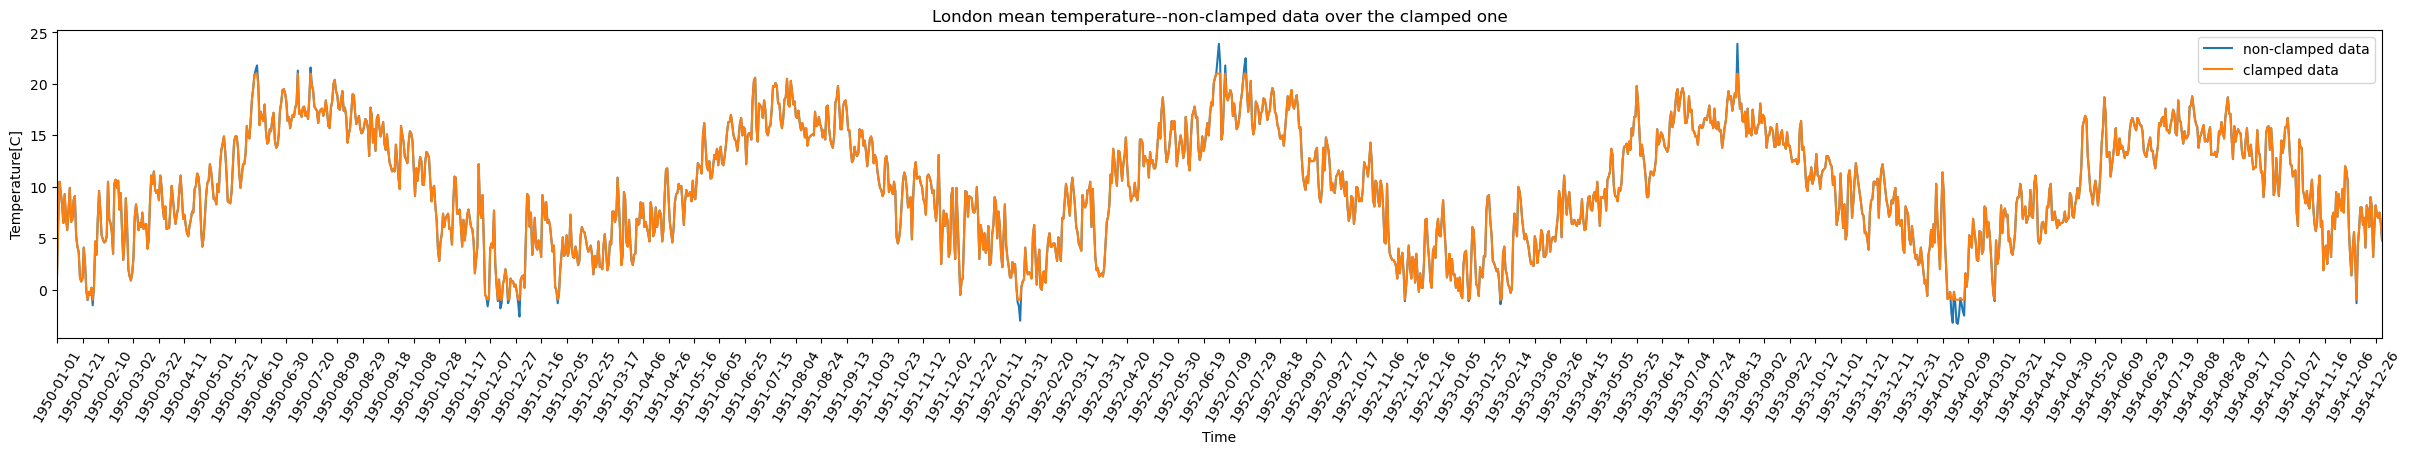

In [50]:
clamped_data = zscore_clamp(mean_temp,2)
x = time_series['time']
ys = [mean_temp,clamped_data]
legend = ['non-clamped data', 'clamped data']

fig, ax = lineplots(x,ys,"London mean temperature--non-clamped data over the clamped one","Time","Temperature[C]",legend)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


`marks:`  use polynomial interpolation to replace the outliers with values predicted by a polynomial fitted to the non-outlier data.

In [51]:
def zscore_interp(data: ArrayLike, time: ArrayLike, threshold: int=2, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    z_scores = zscore_norm(data)
    outlier_index = np.where(np.abs(z_scores) > threshold)[0]

    # filter out outliers
    mask = np.ones_like(data, dtype=bool)
    mask[outlier_index] = False

    # Perform polynomial interpolation on clean data
    p = np.polyfit(time[mask], data[mask], deg = deg)

    # Replace outliers with interpolated values
    interpolated_data = np.copy(data)
    interpolated_data[outlier_index] = np.polyval(p, time[outlier_index])


    return interpolated_data
    
    

C:\Users\Zhou Yuanyuan\AppData\Local\Temp\ipykernel_67348\3308382256.py:23: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(time[mask], data[mask], deg = deg)


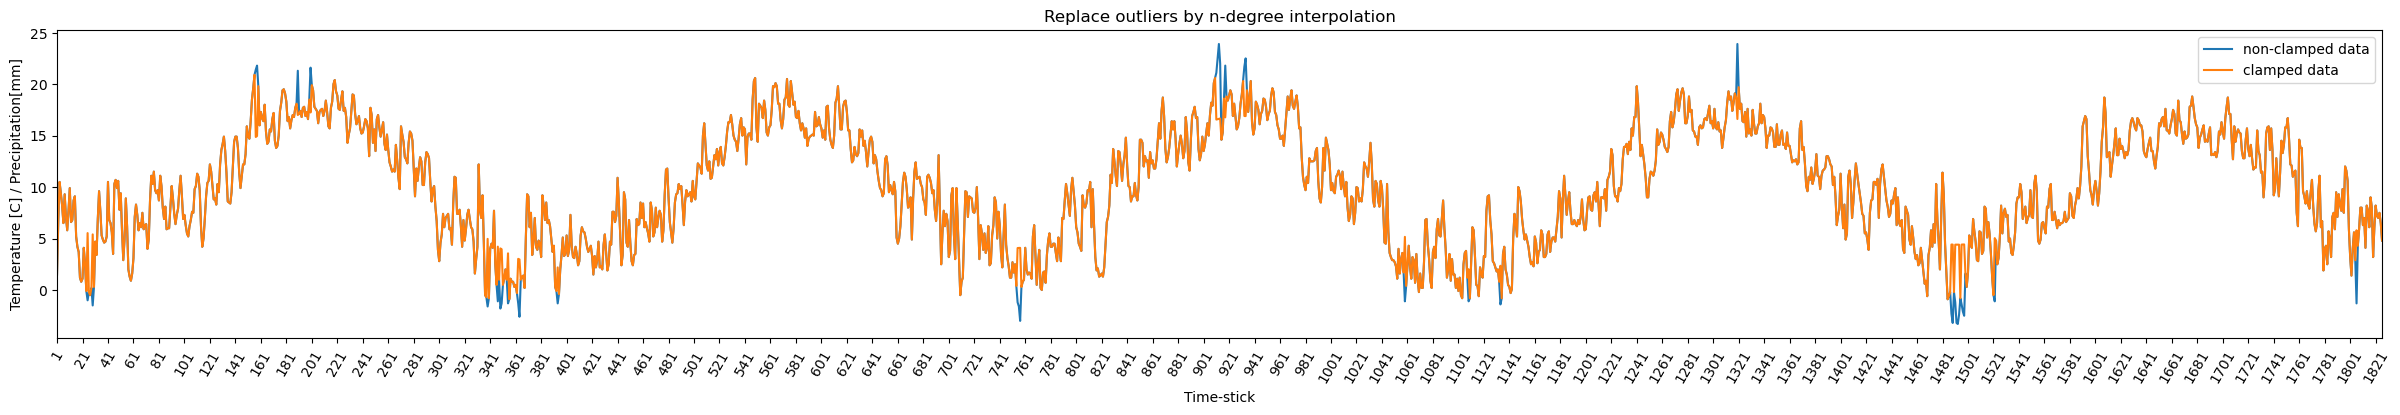

In [52]:
timelen = len(time_series['time'])
time = []
for i in range(1, timelen+1):
    time.append(i)
time = np.array(time)
#x = np.array(mean_temp)
#time = np.array(time_series['time'])
data = np.array(mean_temp)
# deg_values = [1, 3, 11, 23]

interpolated_data = zscore_interp(data, time, deg=25)
ys = [mean_temp,interpolated_data]
fig, ax = lineplots(time,ys,"Replace outliers by n-degree interpolation","Time-stick","Temperature [C] / Precipitation[mm]",legend)
plt.show() 